In [1]:
import os, coda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#assign trace gas measurements to a 64 x 32 grid of lat/lon bins
latbins = np.linspace(-90, 90, 32)
lonbins = np.linspace(-180, 180, 64)
alldata = np.full(4, {'ir1_ch4':np.zeros((32,64)), 'ir3_co':np.zeros((32,64)), 'uv0_o3':np.zeros((32,64)),
                    'uv1_no2':np.zeros((32,64)), 'uv3_bro':np.zeros((32,64)), 'uv4_h2co':np.zeros((32,64)),
                    'uv5_so2':np.zeros((32,64)), 'uv6_oclo':np.zeros((32,64)), 'uv7_so2':np.zeros((32,64)),
                    'uv8_h2o':np.zeros((32,64)), 'uv9_chocho':np.zeros((32,64))})
for file in os.listdir('vcds_timeresolved'):
    for idx in range(4):
        if f'apr_{idx}' in file:
            data = np.loadtxt('vcds_timeresolved/'+file)
            gas = file.split('_')[0] + '_' + file.split('_')[1]
            latloncounts = np.zeros((32,64))
            print(file)
            for i in range(len(data[0])):
                latbin = np.argmin(np.abs(data[-2][i] - latbins))
                lonbin = np.argmin(np.abs(data[-1][i] - lonbins))
                latloncounts[latbin][lonbin] += 1
                alldata[idx][gas][latbin][lonbin] += data[0][i]
            latloncounts[np.where(latloncounts==0)] = 1
            alldata[idx][gas] /= latloncounts

ir1_ch4_apr_0.txt
ir1_ch4_apr_1.txt
ir1_ch4_apr_2.txt
ir1_ch4_apr_3.txt
ir3_co_apr_0.txt
ir3_co_apr_1.txt
ir3_co_apr_2.txt
ir3_co_apr_3.txt
uv0_o3_apr_0.txt
uv0_o3_apr_1.txt
uv0_o3_apr_2.txt
uv0_o3_apr_3.txt
uv1_no2_apr_0.txt
uv1_no2_apr_1.txt
uv1_no2_apr_2.txt
uv1_no2_apr_3.txt
uv3_bro_apr_0.txt
uv3_bro_apr_1.txt
uv3_bro_apr_2.txt
uv3_bro_apr_3.txt
uv4_h2co_apr_0.txt
uv4_h2co_apr_1.txt
uv4_h2co_apr_2.txt
uv4_h2co_apr_3.txt
uv5_so2_apr_0.txt
uv5_so2_apr_1.txt
uv5_so2_apr_2.txt
uv5_so2_apr_3.txt
uv6_oclo_apr_0.txt
uv6_oclo_apr_1.txt
uv6_oclo_apr_2.txt
uv6_oclo_apr_3.txt
uv7_so2_apr_0.txt
uv7_so2_apr_1.txt
uv7_so2_apr_2.txt
uv7_so2_apr_3.txt
uv8_h2o_apr_0.txt
uv8_h2o_apr_1.txt
uv8_h2o_apr_2.txt
uv8_h2o_apr_3.txt
uv9_chocho_apr_0.txt
uv9_chocho_apr_1.txt
uv9_chocho_apr_2.txt
uv9_chocho_apr_3.txt


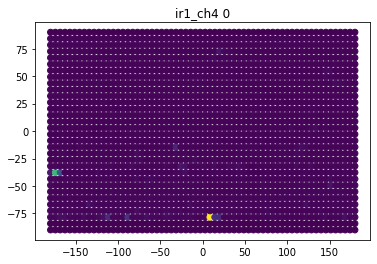

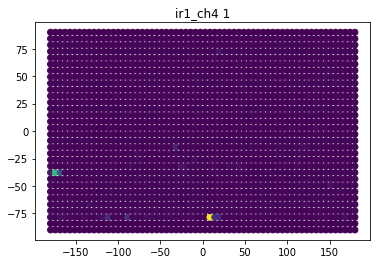

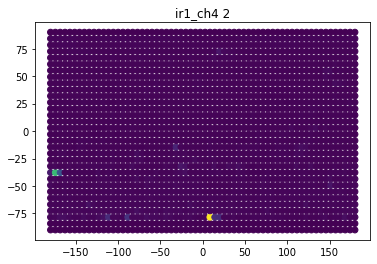

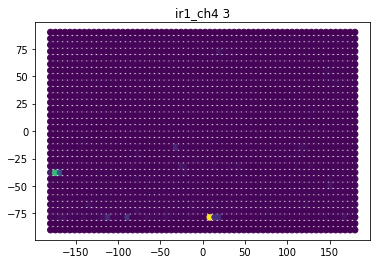

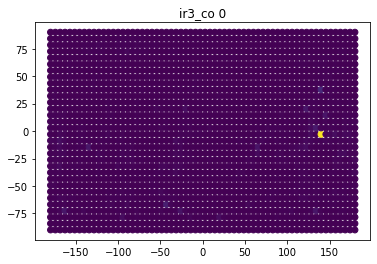

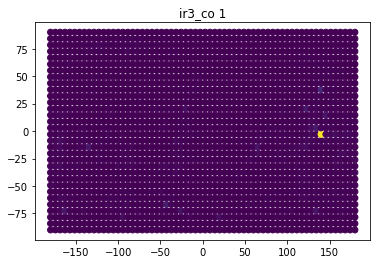

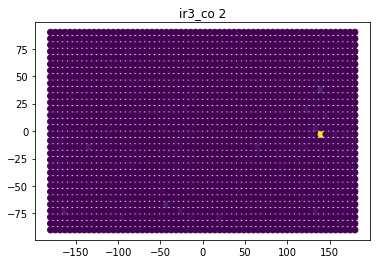

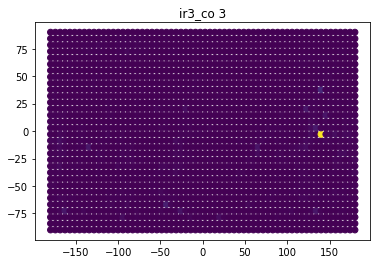

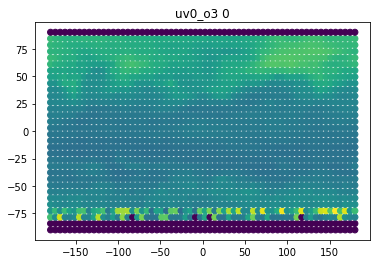

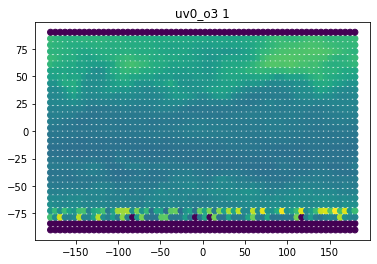

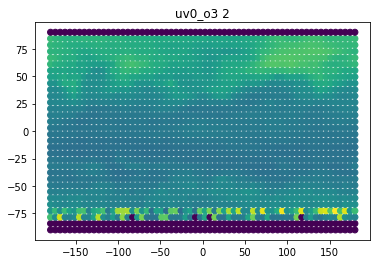

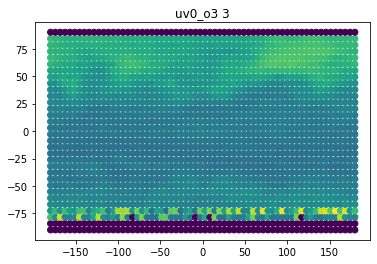

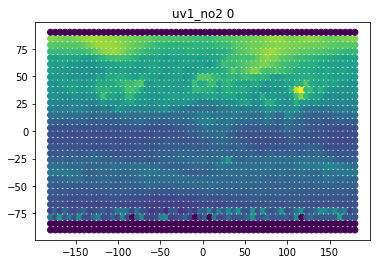

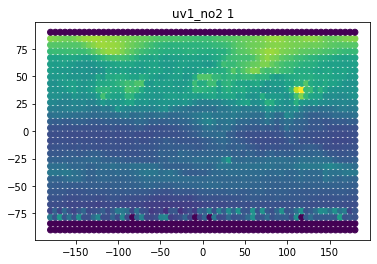

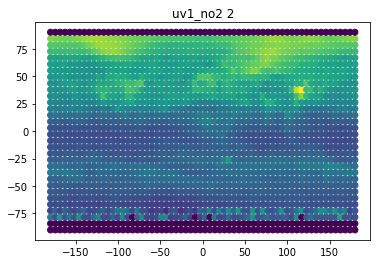

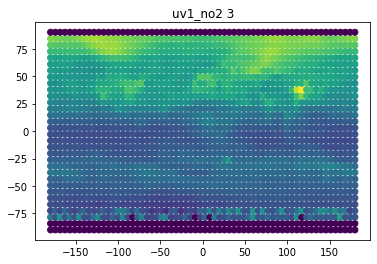

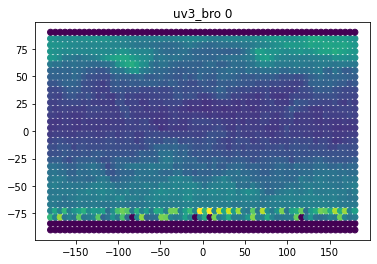

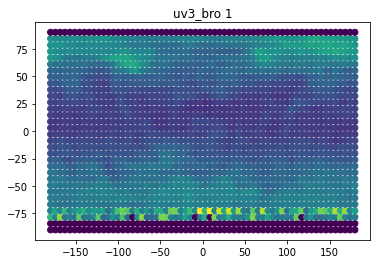

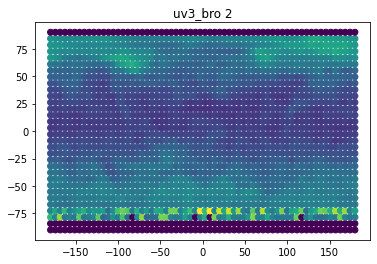

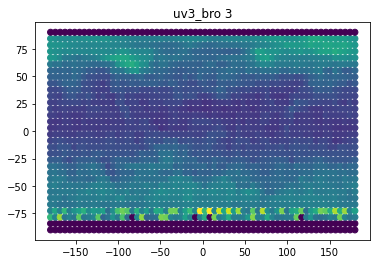

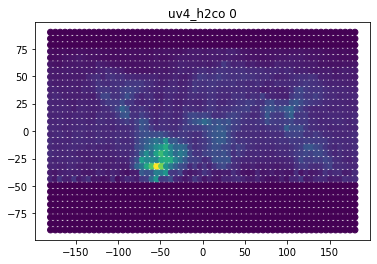

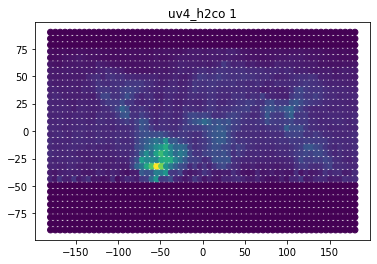

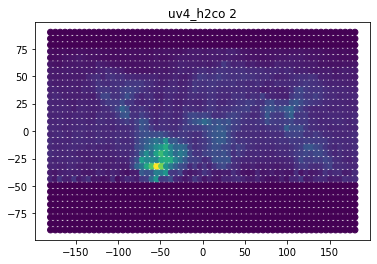

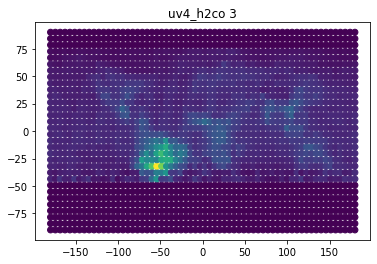

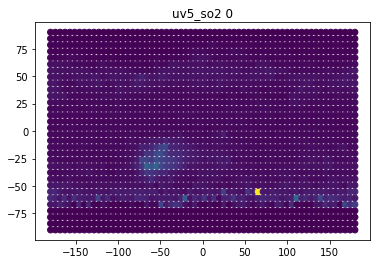

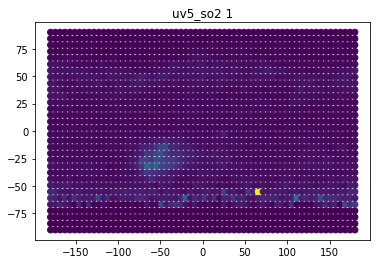

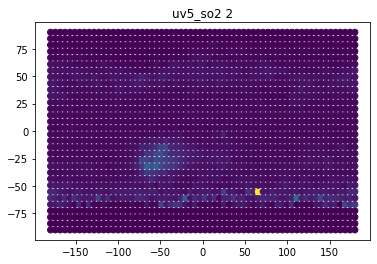

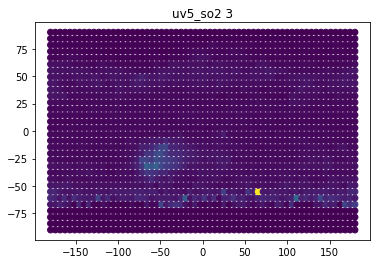

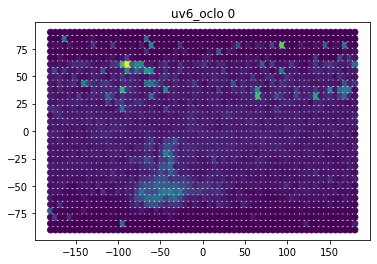

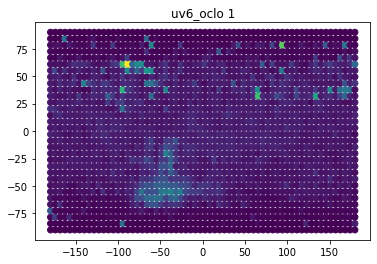

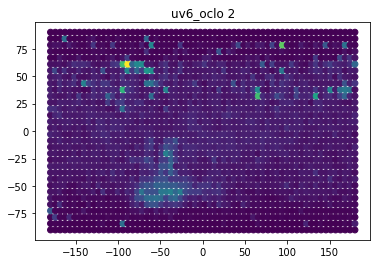

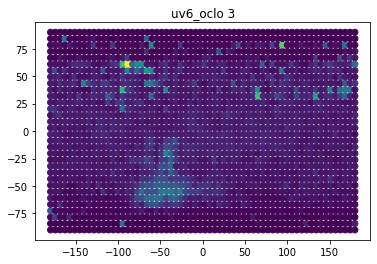

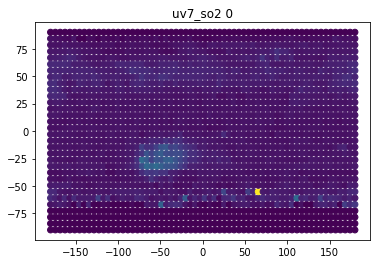

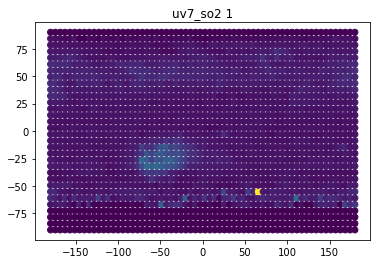

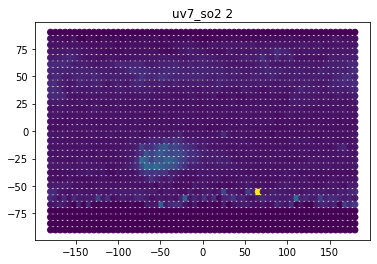

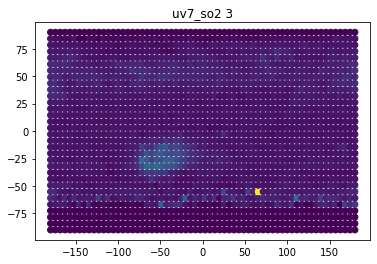

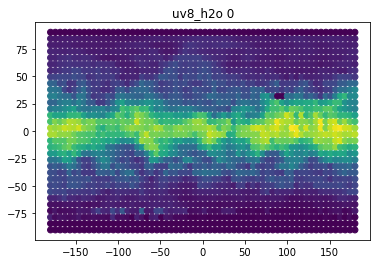

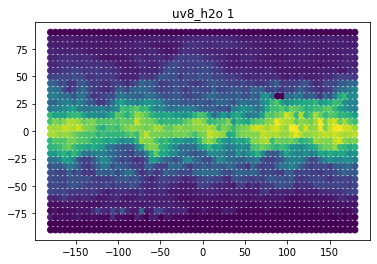

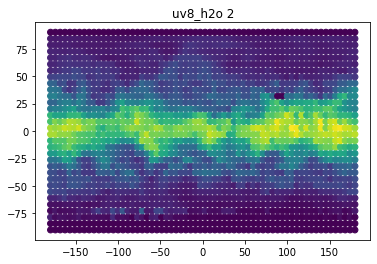

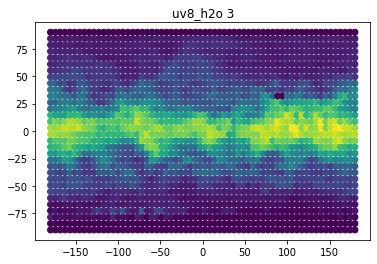

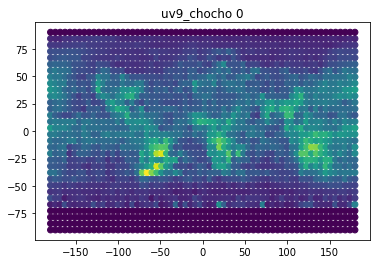

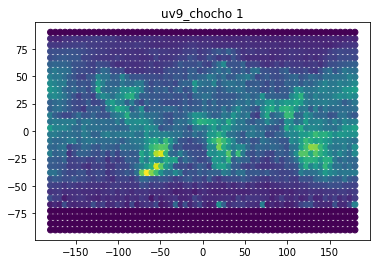

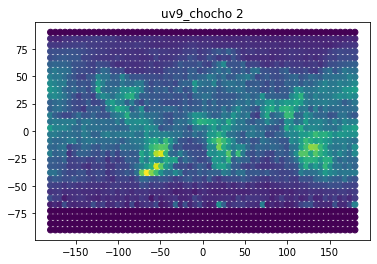

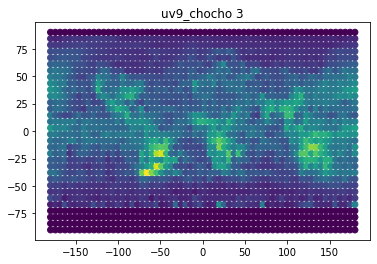

<Figure size 432x288 with 0 Axes>

In [3]:
#visualize binned trace gas maps
lat = np.repeat(np.linspace(-90, 90, 32), 64)
lon = np.tile(np.linspace(-180, 180, 64), 32)
for key in alldata[0].keys():
    for idx in range(4):
        gas = alldata[idx][key].flatten()
        plt.scatter(lon, lat, c=gas)
        plt.title(f'{key} {idx}')
        plt.show()
        plt.clf()

In [4]:
#consolidate all trace gas data into a lat-lon dataframe
import pandas as pd
df = pd.DataFrame(columns=list(alldata[0].keys()))
for idx in range(4):
    for lat in range(len(latbins)):
        for lon in range(len(lonbins)):
            latlondata = {}
            for key in alldata[idx].keys():
                latlondata[key] = alldata[idx][key][lat][lon]
            if set(latlondata.values()) != {0.0}: #ignore lat-lon bins which are all 0
                latlondata['lat'] = latbins[lat]
                latlondata['lon'] = lonbins[lon]
                df = df.append(latlondata, ignore_index=True)
df.head()

ir1_ch4  ir3_co  uv0_o3  uv1_no2  uv3_bro  uv4_h2co  uv5_so2      uv6_oclo  \
0      0.0     0.0     0.0      0.0      0.0       0.0      0.0  5.585824e+11   
1      0.0     0.0     0.0      0.0      0.0       0.0      0.0  6.855015e+11   
2      0.0     0.0     0.0      0.0      0.0       0.0      0.0  3.857992e+11   
3      0.0     0.0     0.0      0.0      0.0       0.0      0.0  4.840659e+11   
4      0.0     0.0     0.0      0.0      0.0       0.0      0.0  1.177862e+12   

   uv7_so2  uv8_h2o  uv9_chocho        lat         lon  
0      0.0      0.0         0.0 -84.193548 -180.000000  
1      0.0      0.0         0.0 -84.193548 -174.285714  
2      0.0      0.0         0.0 -84.193548 -168.571429  
3      0.0      0.0         0.0 -84.193548 -162.857143  
4      0.0      0.0         0.0 -84.193548 -122.857143

In [5]:
df.to_csv('apr.csv', index=False)

In [4]:
#now we can just follow the standard PCA procedure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = list(df.keys())
features.remove('lat')
features.remove('lon')
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                                                 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

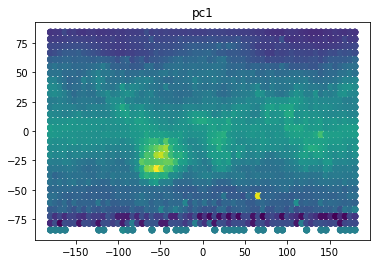

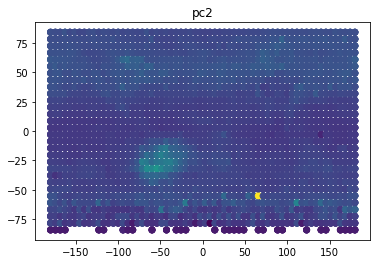

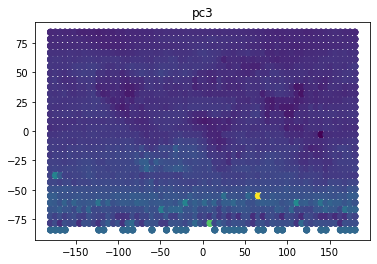

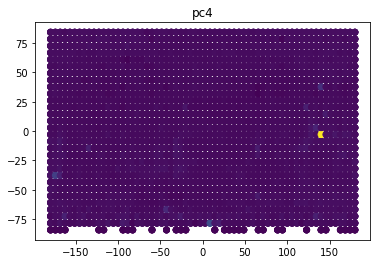

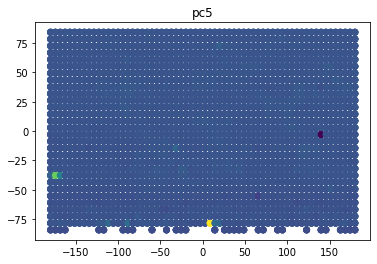

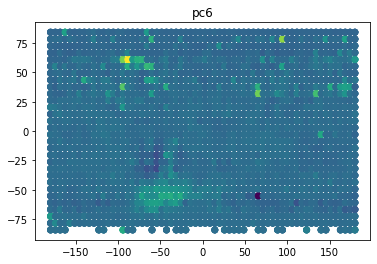

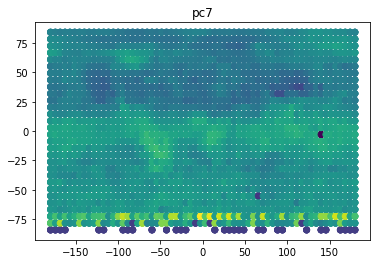

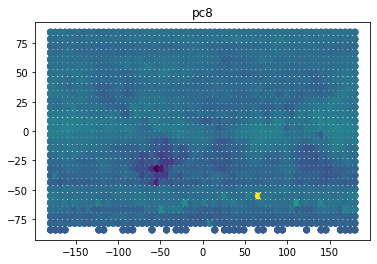

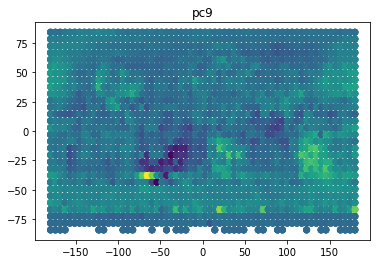

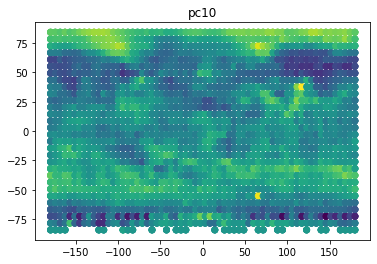

<Figure size 432x288 with 0 Axes>

In [3]:
for pc in principalDf.columns:
    plt.scatter(df['lon'], df['lat'], c=list(principalDf[pc]))
    plt.title(f'{pc}')
    plt.show()
    plt.clf()

Text(0, 0.5, 'Variance Fraction (%)')

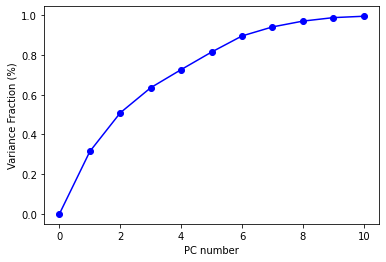

In [5]:
frac = []
for i in range(11):
    frac.append(np.sum(pca.explained_variance_ratio_[:i]))
plt.plot(frac, marker='o', color='b')
plt.xlabel('PC number')
plt.ylabel('Variance Fraction (%)')

In [5]:
pca.explained_variance_ratio_

array([0.31449921, 0.19461346, 0.12625726, 0.0911936 , 0.08833841,
       0.08106936, 0.045487  , 0.02925115, 0.01751659, 0.00696413])